# Hw 2: More Pandas and Data Exploration! 🐼

Name: Jeff Che

Student ID: 464957

Collaborators:

## Instructions

For this homework, work through **Lab 2 (Analyzing the MoMA Data)** first. In general, you should feel free to import any package that we have previously used in class. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend).

Frequently **save** your notebook!

### Collaborators and Sources
Furthermore, in addition to recording your **collaborators** on this homework, please also remember to **cite/indicate all external sources** used when finishing this assignment. 
> This includes peers, TAs, and links to online sources. 

Note that these citations will be taken into account during the grading and regrading process.

In [41]:
# collaborators and sources:
# Albert Einstein and Marie Curie
# https://developers.google.com/edu/python/strings

# your code here
answer = 'my answer'

### Submission instructions
* Submit this python notebook including your answers in the code cells as homework submission.
* **Do not change the number of cells!** Your submission notebook should have exactly one code cell per problem. 
* Do **not** remove the `# your code here` line and add you solution after that line. 

## 1. Pandas!

In lab, we used a Python package called [Pandas](https://pandas.pydata.org), a tool for manupulating tabular data (i.e. data that is stored in the form of tables). Let's recap some of its capabilities.

In [42]:
import pandas as pd

For example, consider the following table:

| id | name     | rating |
|:--:|:-------- |:------:|
| 1  | Sandwich | 3      |
| 2  | Steak    | 4      |
| 3  | Pizza    | 5      |

### Problem 1.1

Let's load in the rest of the data — the complete file is located in `utility/data/food-data.csv`.

**Try this!** Navigate to the file containing the data and take a look at it. Based on the format of the data, choose the most applicable Pandas reader from [this list](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) and load the data into `food_data`. Evaluate the variable to see the contents of the dataset.

In [43]:
# your code here

food_data = pd.read_csv("./utility/data/food-data.csv")
food_data


,id,name,rating
0,1,sandwich,3
1,2,steak,4
2,3,pizza,5
3,4,cheese burger,4
4,5,tator tots,1
5,6,hotdog,2
6,7,philly cheesesteak,3
7,8,nachos,2
8,9,blueberry cobbler,1
9,10,chocolate-chip cookies,4


The core data structure of Pandas is called a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). It provides an API that allows you to interact with tabular data easily. For example, you can display the first 5 rows quickly by using the `head` method.

In [44]:
food_data.head()

,id,name,rating
0,1,sandwich,3
1,2,steak,4
2,3,pizza,5
3,4,cheese burger,4
4,5,tator tots,1


Since CSV is a standard format, Pandas knew how to read the data and even assumed that the first row was the header row containing the column headers. You can access these column names in the `columns` property of a DataFrame.

In [45]:
food_data.columns

Index(['id', 'name', 'rating'], dtype='object')

Some data is stored without a header row. If this is the case, the data will usually be accompanied by some documentation explaining what each column should be. Pandas readers allow you to customize whether or not it should expect a header row, and many other table features, to your dataset. Try evaluating the reader function you used in [Problem 1.1](#Problem-1.1) after appending a [`?`🔗](https://ipython.readthedocs.io/en/stable/interactive/python-ipython-diff.html#accessing-help) to it.

In [46]:
food_data?

Type:        DataFrame
String form:
id                    name  rating
           0   1                sandwich       3
           1   2                 <...>        nachos       2
           8   9       blueberry cobbler       1
           9  10  chocolate-chip cookies       4
Length:      10
File:        ~/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py
Docstring:  
Two-dimensional size-mutable, potentially heterogeneous tabular data
structure with labeled axes (rows and columns). Arithmetic operations
align on both row and column labels. Can be thought of as a dict-like
container for Series objects. The primary pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, or list-like objects

    .. versionchanged :: 0.23.0
       If data is a dict, argument order is maintained for Python 3.6
       and later.

index : Index or array-like
    Index to use for resultin

### 1.1 Indexing with DataFrames

You can access specific columns by indexing into the DataFrame by the column's name. For example, if we wanted to get the values in the `name` column, we would do this:

In [47]:
food_data['name']

0                  sandwich
1                     steak
2                     pizza
3             cheese burger
4                tator tots
5                    hotdog
6        philly cheesesteak
7                    nachos
8         blueberry cobbler
9    chocolate-chip cookies
Name: name, dtype: object

Columns are also accessible as properties on the DataFrame object so the following cell is equivalent to the previous one.

In [48]:
food_data.name

0                  sandwich
1                     steak
2                     pizza
3             cheese burger
4                tator tots
5                    hotdog
6        philly cheesesteak
7                    nachos
8         blueberry cobbler
9    chocolate-chip cookies
Name: name, dtype: object

You can also access multiple columns by specifying a list of columns to retrieve.

In [49]:
food_data[['name', 'rating']]

,name,rating
0,sandwich,3
1,steak,4
2,pizza,5
3,cheese burger,4
4,tator tots,1
5,hotdog,2
6,philly cheesesteak,3
7,nachos,2
8,blueberry cobbler,1
9,chocolate-chip cookies,4


You can imagine this being particularly useful when we want to select only a few, meaningful data features from a large dataset to explore in more detail.

DataFrames also have a `loc` property that allows you to write more complex indexing operations on the DataFrame. Here we are indexing in to both axes of the DataFrame to get the `name` and `rating` values of the first three rows. Try evaluating `food_data.loc?` as well for more infomation.

In [50]:
food_data.loc[:3, ['name', 'rating']]

food_data.loc?

Type:        property
String form: <property object at 0x11eb2b4f8>
Docstring:  
Access a group of rows and columns by label(s) or a boolean array.

``.loc[]`` is primarily label based, but may also be used with a
boolean array.

Allowed inputs are:

- A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
  interpreted as a *label* of the index, and **never** as an
  integer position along the index).
- A list or array of labels, e.g. ``['a', 'b', 'c']``.
- A slice object with labels, e.g. ``'a':'f'``.

  .. warning:: Note that contrary to usual python slices, **both** the
      start and the stop are included

- A boolean array of the same length as the axis being sliced,
  e.g. ``[True, False, True]``.
- A ``callable`` function with one argument (the calling Series, DataFrame
  or Panel) and that returns valid output for indexing (one of the above)

See more at :ref:`Selection by Label <indexing.label>`

Raises
------
KeyError:
    when any items are not found

See Also
--------

In HW1, we practiced using boolean indexing to access specific elements in NumPy arrays. We can do the same with Pandas DataFrames. In the following cell, we check for the rows that have a rating less than 3.

In [51]:
food_data['rating'] < 3

0    False
1    False
2    False
3    False
4     True
5     True
6    False
7     True
8     True
9    False
Name: rating, dtype: bool

This gives us a boolean `Series`, the Pandas name for a 1D object — it is analogous to a 1D NumPy boolean array. We can then use this boolean array to get the rows that meet the condition.

In [52]:
food_data[food_data['rating'] < 3]

,id,name,rating
4,5,tator tots,1
5,6,hotdog,2
7,8,nachos,2
8,9,blueberry cobbler,1


In [53]:
food_data[food_data['rating'] == 3]

,id,name,rating
0,1,sandwich,3
6,7,philly cheesesteak,3


We can also sample a specific number of rows from a dataset using the `sample` method.

In [54]:
food_data.sample(5)

,id,name,rating
3,4,cheese burger,4
5,6,hotdog,2
2,3,pizza,5
9,10,chocolate-chip cookies,4
8,9,blueberry cobbler,1


### 1.2 Data Exploration with DataFrames

In addition to indexing operations, DataFrames also provide common summary statistics for the data exploration like `mean`, `max`, etc.

In [55]:
food_data['rating'].mean()

2.9

In [56]:
food_data['rating'].max()

5

We can also get the shape of a dataset quickly from a DataFrame.

In [57]:
food_data.shape

(10, 3)

The data in a DataFrame is stored in a form that is similar to a NumPy array so it can easily be converted to one.

In [58]:
food_data.values

array([[1, 'sandwich', 3],
       [2, 'steak', 4],
       [3, 'pizza', 5],
       [4, 'cheese burger', 4],
       [5, 'tator tots', 1],
       [6, 'hotdog', 2],
       [7, 'philly cheesesteak', 3],
       [8, 'nachos', 2],
       [9, 'blueberry cobbler', 1],
       [10, 'chocolate-chip cookies', 4]], dtype=object)

Finally, Pandas provides some convenience functions that allow us to quickly, but minimalistically, visualize our data. This is great for initial exploration, but you'll want to implement your own plots for communicating your results.

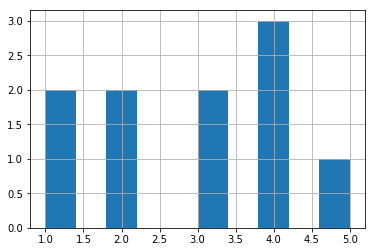

In [59]:
food_data['rating'].hist()

## 2. Getting Familiar with the Data Set

In the following section, we will take a look at some data and do some preliminary exploration. The data set we will be using is from the [World Happiness Report from 2019](https://worldhappiness.report).

### Problem 2.1

First, let's load in the data into `happiness`.

**Try this!** In the cell below, load the data set in `happiness.csv`. If the following cell fails, please make sure that you have downloaded the data.

In [60]:
import os

data = 'utility/data'

assert os.path.exists(data), \
    'Unable to find data; make sure that you have the `utility` directory'

# your code here

happiness = pd.read_csv("./utility/data/happiness.csv")
happiness


,Country,Score,Region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.769,Europe,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,Europe,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,Europe,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,Europe,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,Europe,1.396,1.522,0.999,0.557,0.322,0.298
5,Switzerland,7.480,Europe,1.452,1.526,1.052,0.572,0.263,0.343
6,Sweden,7.343,Europe,1.387,1.487,1.009,0.574,0.267,0.373
7,New Zealand,7.307,Asia & Pacific,1.303,1.557,1.026,0.585,0.330,0.380
8,Canada,7.278,North America,1.365,1.505,1.039,0.584,0.285,0.308
9,Austria,7.246,Europe,1.376,1.475,1.016,0.532,0.244,0.226


### Problem 2.2

Next, let's get to know our data set.

**Try this!** Use the cell below to investigate the data set as you answer the following questions.

In [61]:
# your code here

happiness.shape #to know how much "stuff" we are dealing with

happiness.columns #to see features


Index(['Country', 'Score', 'Region', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

**Write-up!** How many observations are in our dataset? How many features does each one have?

**Write-up!** What are the features? What types are each of them? How are they represented?

### Problem 2.3

**Write-up!** What does this data set seem to be about? If this data set was used to build a model, which features could be the targets? Which would be the inputs?

Here is the data set again.

In [62]:
happiness.head()

,Country,Score,Region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.769,Europe,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,Europe,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,Europe,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,Europe,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,Europe,1.396,1.522,0.999,0.557,0.322,0.298


## 3. Exploring The Features

Next, let's take a look at the features individually.

### Problem 3.1

**Try this!** In the cell below, create an indexer that can be used to get the numerical columns of the `happiness` DataFrame and store it in `numerical`. For example, if we evaluated `happiness[numerical]`, we would get all columns with names in `numerical`.

In [63]:
# your code here

import numpy as np

#numerical = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

placeholder =  happiness.select_dtypes(include=np.number)
#help from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html

numerical = placeholder.columns

#numerical = happiness._get_numeric_data()
#found get numeric data function here: https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas

happiness[numerical]



,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,7.246,1.376,1.475,1.016,0.532,0.244,0.226


### Problem 3.2

**Try this!** Use the cell below to investigate the data set as you answer the following questions.

In [64]:
# your code here

import math

a = happiness[numerical]

def find_avg (lst):
    return sum(lst) / len(lst)

avg_score = a.apply(find_avg)

def find_std (lst):
    mean = sum(lst) / len(lst)
    return math.sqrt(sum((i - mean)**2 for i in lst) / len(lst))

std = a.apply(find_std)

avg_score
std

#test = a.std()
#test


Score                           1.109546
GDP per capita                  0.397111
Social support                  0.298231
Healthy life expectancy         0.241347
Freedom to make life choices    0.142829
Generosity                      0.094949
Perceptions of corruption       0.094234
dtype: float64

**Write-up!** What are the average values for each numeric feature?

Recall, sample standard deviation is given by
$$\text{std}(x) = s_X = \sqrt{\dfrac{\sum_{i=1}^n (x_i - \mu)^2}{N - 1}}.$$

**Write-up!** Which feature has the largest sample standard deviation? Which one has the lowest?

> Note that this is just for practicing how to retrieve these values. Since the scales for each may be different, we cannot meaningfully compare each standard deviation value.

### Problem 3.3

Let's implement a median finding function.

**Try this!** Complete the function below so that it returns the `median` of an array `x`. Be sure to use vectorized NumPy operations to do this, but do not use NumPy's built-in median function.

In [65]:
import numpy as np

def compute_median(x, axis=0):
    '''
    Returns the median average for an array X. AXIS specifies the axis of the
    array to take the averages across.
    '''
    # your code here
    
    #help from https://stackoverflow.com/questions/24101524/finding-median-of-list-in-python
    
    median = 0
    sorted_x = sorted(x)
    length = len(x)
    index = (length - 1)//2
    
    if (length%2):
        median = sorted_x[index]
    else:
        median = (sorted_x[index] + sorted_x[index + 1])/2.0

    
    assert np.isclose(median, np.median(x)), \
        "👀 Please double check your implementation's result as it does not match NumPy's."
    
    return median

# even number of values
x = np.random.rand(10)
compute_median(x)

# odd number of values
x = np.random.rand(9)
compute_median(x)

0.6192890551084084

Let's try using your implementation to compute the median values for each feature.

**Try this!** Use the [`apply`🔗](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) method on DataFrames to compute the medians for each feature and store the result in `medians`.

In [66]:
# your code here
medians = happiness[numerical].apply(compute_median)

assert np.all(medians == happiness.median()), \
    '👀 There seems to be an issue with your implementation. Please double check.'

medians

Score                           5.3795
GDP per capita                  0.9600
Social support                  1.2715
Healthy life expectancy         0.7890
Freedom to make life choices    0.4170
Generosity                      0.1775
Perceptions of corruption       0.0855
dtype: float64

### Problem 3.4

Let's create some plots.

**Try this!** In the cell below, create a plot with box plots for each numerical feature. You can use the `.values` property of DataFrames to get a NumPy array. Ensure that your plot has all of the necessary components.

> Optional: Try using a [`violin plot`🔗](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.violinplot.html?highlight=violinplot#matplotlib.pyplot.violinplot) to visualize each feature. You can use this function the same way as you would use `boxplot`.

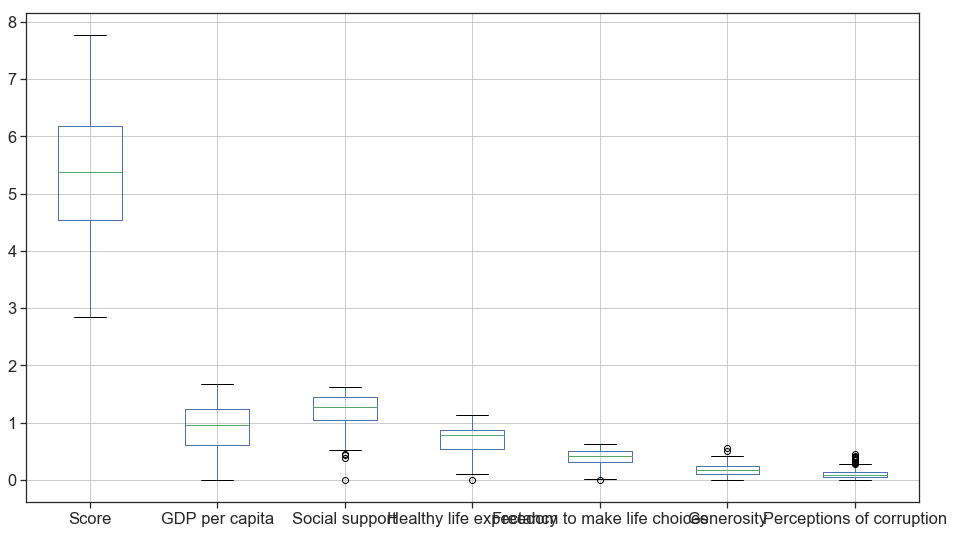

In [67]:
import matplotlib.pyplot as plt
from utility.util import configure_plots

configure_plots()

# your code here

plot = pd.DataFrame(happiness[numerical])

plot.boxplot()

**Write-up!** What does the box plot tell you about the features? Specifically, what can we say about Social support, Generosity, and Perceptions of Corruption?

## 4. Comparing Pairs of Features

Now that we have a sense of what each of the features look like, we can start examining their relationships with each other.

### Problem 4.1

**Try this!** Complete the function below so that it will display a scatter plot given a data frame and two column names.

In [68]:
def scatter_columns(df, first_column, second_column):
    '''
    Creates a scatter plot of two columns of a data frame.
    '''
    
    # your code here
    
    first = df[first_column]
    second = df[second_column]
    vs = ' vs '
    
    plt.scatter(first, second, 80, marker='o')

    plt.title(first_column + vs + second_column)
    plt.xlabel(first_column)
    plt.ylabel(second_column)


**Try this!** Using the function `scatter_columns` from above, explore various combinations of features to see which ones show some kind of trend or pattern.

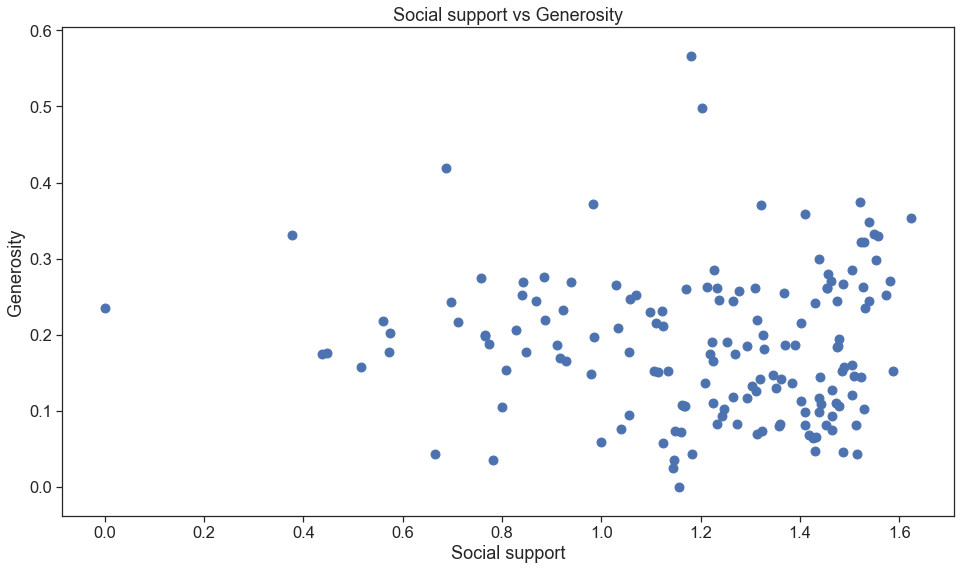

In [69]:
# your code here

#scatter_columns(happiness, 'Score', 'GDP per capita')
#scatter_columns(happiness, 'Healthy life expectancy', 'GDP per capita')
scatter_columns(happiness, 'Social support', 'Generosity')


**Write-up!** Which pairs of features show the most trend? Describe these trends? Additionally, given this information, what might you conclude? Were you surprised by your plots?

### Pearson Correlation

There are several ways to quantify trends, but let's pick one to discuss today. The [Pearson Correlation Coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) (commonly denoted by $\rho$ or $r$) is a frequently used statistic for quantifying linear relationships between two variables (or features in our case). It has a value of $+1$ if there is a positive linear trend, a value of $-1$ if there is a negative trend, and a value of $0$ if there is no trend.

<img src="utility/pics/correlation.png" alt="correlation" width="80%"/>

We can compute the sample correlation coefficient, $r$, with the following formula:
$$
r(X, Y) = \dfrac{\text{Cov}(X, Y)}{s_X s_Y} = \dfrac{\sum_{i=1}^n (X_i - \mu_X)(Y_i - \mu_Y)}{s_X s_Y},
$$
where $X$ and $Y$ are variables, $\mu$ is a mean, and $s$ is a sample standard deviation,
$$
s_X = \dfrac{1}{1-n} \sum_{i=1}^n (X - \mu_X)^2.
$$

### Problem 4.2

**Try this!** Complete the `correlation` function in the following cell so that it computes the correlation coefficient between two arrays `x` and `y`. Remember to use vectorized operations, but do not use NumPy's built in functions for variance, covariance, standard deviation, or correlation coefficient. _**Hint**: It may be helpful to work out the math for the equations. You can start by ["foiling"](https://en.wikipedia.org/wiki/FOIL_method) the numerator._

In [70]:
import math

def correlation(x, y):
    '''
    Returns the sample Pearson Correlation Coefficient between arrays X and Y.
    '''
    
    # your code here
    
    #both need to be same size
    if len(x) != len(y):
        return
    
    x_mean = sum(x) / len(x)
    y_mean = sum(y) / len(y)
    
    stdX = math.sqrt(sum((xi - x_mean)**2 for xi in x) / len(x))
    stdY = math.sqrt(sum((yi - y_mean)**2 for yi in y) / len(y))
    
    c = 0
    for i in range(0, len(x)):
        c = c + ((x[i] - x_mean) * (y[i] - y_mean))
    
    covar = c/(len(x))
    
    corr = covar/(stdX*stdY)
    
    assert np.isclose(corr, np.corrcoef(x, y)[0,1]), \
        "👀 Please double check your implementation's result as it does not match NumPy's."
    
    return corr

correlation(happiness.Score, happiness.Generosity)

0.07582369490389652

Let's try using your implementation to compute some correlation coefficients.

**Try this!** In the cell below, compute the correlation coefficient values between `Score` and every other feature, pairwise, and store them in `corrs`. _**Hint**: Use `numerical` from [Problem 3.1](#Problem-3.1) and the `.columns` property of DataFrames to get the names of the columns that you need._

In [71]:
# your code here

#happiness[numerical].columns

corrs = []
for x in numerical:
    corrs.append(correlation(happiness['Score'], happiness[x]))
    
corrs = np.array(corrs)

#comparing your implementation to Pandas
assert np.isclose(corrs, happiness.corr().iloc[0, :]).all(), \
    '👀 There seems to be an issue with your implementation. Please double check.'

corrs

array([1.        , 0.79388287, 0.77705779, 0.77988315, 0.56674183,
       0.07582369, 0.38561307])

Let's visualize these correlation values. To do this, we will use [Seaborn's](https://seaborn.pydata.org) `heatmap` function.

Text(0.5, 1.0, 'Correlation: Score vs Rest')

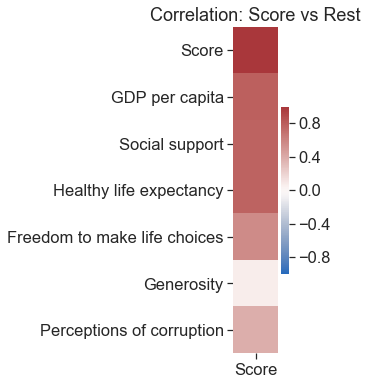

In [72]:
import seaborn as sns

plt.figure(figsize=(1, 6))
sns.heatmap(corrs[:,None], cmap=sns.cm.vlag, vmin=-1)
plt.xticks([0.5], ['Score'], rotation=0)
plt.yticks(np.arange(corrs.shape[0]) + 0.5, happiness.loc[:,numerical].columns, rotation=0)
plt.title('Correlation: Score vs Rest')

As you may have seen in the assertion at the end of an earlier cell, we can get the _Correlation Matrix_ of pairwise correlation values by using the `.corr` method on DataFrames.

In [73]:
happiness.corr()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


Text(0.5, 1.0, 'Happiness: Correlation Matrix')

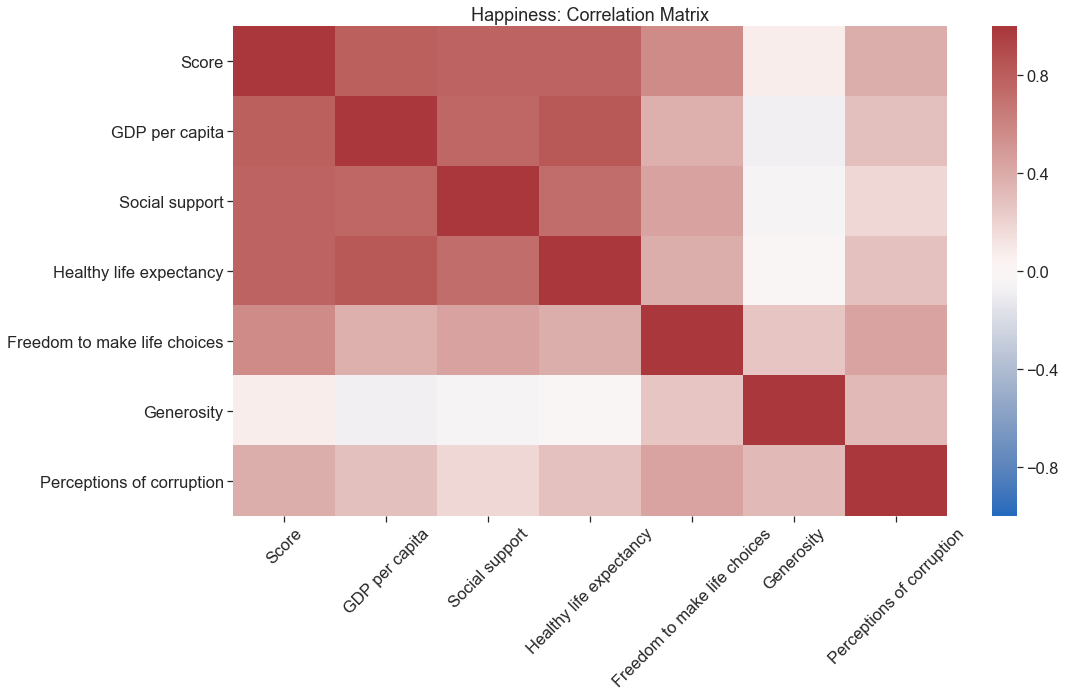

In [74]:
sns.heatmap(happiness.corr(), cmap=sns.cm.vlag, vmin=-1)
plt.xticks(rotation=45)
plt.title('Happiness: Correlation Matrix')